## plt vs fig, ax:
plt: 
- Similar to matlab interface.
- Better for simple quick plots. 
- Objects are created automatically. 
- Use plt methods to interact with said objects.

fig, ax: more explicitly object oriented
- fig: think of as canvas. only specify a few things: dimentions, background, or savefig.
- ax: all objects to add to figure. CDK

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 3d plot
from mpl_toolkits import mplot3d

#### Simple plot
- using just ```plt```

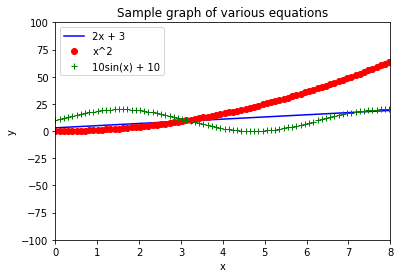

In [2]:
n = 100
x = np.linspace(0, 10, n)
y = np.zeros((n, 3))
y[:, 0] = 2*x + 3
y[:, 1] = x**2
y[:, 2] = 10*np.sin(x) + 10

# plt.plot(x, y)  # simpler way to plot all curves at once
# plt.legend(("2x + 3", "x^2", "10sin(x) + 10"))
plt.plot(x,y[:,0], 'b-', label="2x + 3") # this lets you change plotting mark
plt.plot(x,y[:,1], 'ro', label="x^2")
plt.plot(x,y[:,2], 'g+', label="10sin(x) + 10")
plt.legend()
plt.xlabel("x")
# plt.semilogx()
plt.ylabel("y")
plt.xlim([0, 8])
plt.ylim([-100, 100])
plt.title("Sample graph of various equations")
plt.show()


#### More customized plot

In [3]:
# some initial data processing

n = 50
vals = np.linspace(0, 10, n)
lin_i = np.interp(vals, x, y[: ,0])  # interpolate to get arrays same length (not actually needed here)
exp_i = np.interp(vals, x, y[:, 1])
sin_i = np.interp(vals, x, y[: , 2])
area = np.vstack([lin_i, exp_i, sin_i])
mean = area.mean(axis=0)  # calculate mean
std = mean.std(axis=0, ddof=1)

<Figure size 432x288 with 0 Axes>

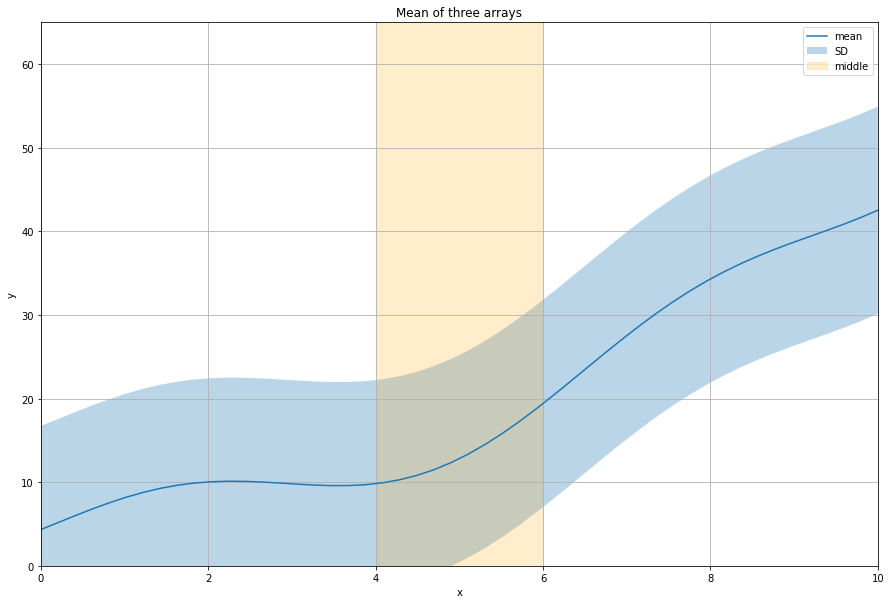

In [17]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=[15,10])
fig.patch.set_facecolor('white')
ax.grid(True)
ax.plot(vals, mean, label='mean', alpha=1)
ax.fill_between(vals, mean-std, mean+std, label='SD', alpha=.3)
ax.set_title('Mean of three arrays')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([0, 10])
ax.set_ylim([0, 65])
ax.axvspan(4, 6, alpha=.2, color='orange', label='middle')
ax.legend()
fig.savefig('fig_title.png')

Text(0.5, 0, 'x')

<Figure size 432x288 with 0 Axes>

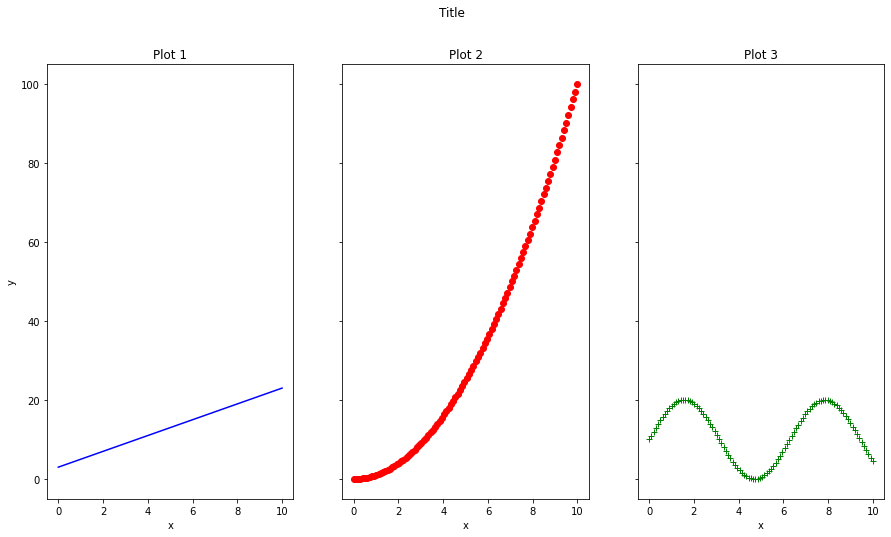

In [21]:
n = 100
x = np.linspace(0, 10, n)
y = np.zeros((n, 3))
y[:, 0] = 2*x + 3
y[:, 1] = x**2
y[:, 2] = 10*np.sin(x) + 10

# multiple subplots
fig = plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=[15,8], sharey='all')
fig.suptitle('Shared Title')
fig.patch.set_facecolor('white')

ax1.plot(x,y[:,0], 'b-', label="2x + 3")
ax1.set_title('Plot 1')
ax1.set_ylabel('y')
ax1.set_xlabel('x')

ax2.plot(x,y[:,1], 'ro', label="x^2")
ax2.set_title('Plot 2')
ax2.set_xlabel('x')

ax3.plot(x,y[:,2], 'g+', label="10sin(x) + 10")
ax3.set_title('Plot 3')
ax3.set_xlabel('x')


/var/folders/md/rj7yjp0d6zg2cr6shydbj4500000gn/T/ipykernel_823/1597155829.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


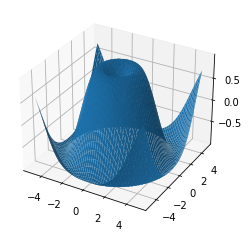

In [22]:
# multi variable and derivatives
fig = plt.figure()
ax = fig.gca(projection='3d')
n = 100
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)
z = np.sin(r)

surf = ax.plot_surface(x, y, z)
plt.show()

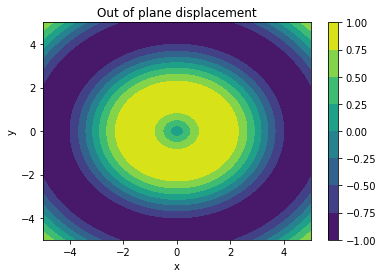

In [6]:
# contour plot
fig,ax = plt.subplots(1,1)
contour = ax.contourf(x,y,z)
fig.colorbar(contour)
ax.set_title('Out of plane displacement')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# alternative with in line labels
contour = ax.contour(x,y,z)  # contour NOT contourf
# ax.clabel(contour,inline=True,fontsize=10)

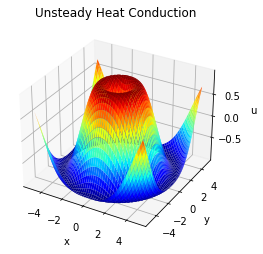

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('Unsteady Heat Conduction')
plt.show()